<a href="https://colab.research.google.com/github/mralamdari/YOLO/blob/main/Yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#install necessary libraries
!pip install awscli
!pip install ultralytics
clear_output()

#Data

In [3]:
#clone OIDv4_ToolKit
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 499 (delta 32), reused 52 (delta 31), pack-reused 444
Receiving objects: 100% (499/499), 34.11 MiB | 35.00 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [4]:
%cd OIDv4_ToolKit

#Write your desired objects (--classes) and data type (--type_csv)  and the number of images you want (--limit)
# !python3 main.py downloader --classes Truck --type_csv train --limit 100

!python3 main.py downloader --classes Truck Person Tree --type_csv train --limit 200

/content/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Truck.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 41785 KB/s, 0 seconds pass

In [5]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Tree
100% 200/200 [00:24<00:00,  8.15it/s]
Converting annotations for class: Person
100% 200/200 [00:17<00:00, 11.14it/s]
Converting annotations for class: Truck
100% 200/200 [00:04<00:00, 40.28it/s]


#Detection

In [6]:
path = '/content/data/obj/train/'
os.makedirs('/content/train/images', exist_ok=True)
os.makedirs('/content/train/labels', exist_ok=True)

for j in os.listdir('/content/data/obj/train/'):
  for i in os.listdir(path+j):
    file_type = 'labels' if i[-4:] == '.txt' else 'images'
    os.rename(path+j+'/'+i, f'/content/train/{file_type}/{i}')

In [7]:
with open('/content/config.yaml', 'w+') as f:
    config_files = f.write(f"""path: /content/train # dataset root dir
train: images  # train images (relative to 'path')
val: images  # val images (relative to 'path')


# Classes
names:
  0: Tree
  1: Person
  2: Truck""")

In [10]:
from ultralytics import YOLO

# model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

results = model.train(data='/content/config.yaml', epochs=5)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [11]:
!scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [12]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning /content/train/labels.cache... 586 images, 0 backgrounds, 0 corrupt: 100%|██████████| 586/586 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [02:17<00:00,  3.71s/it]
                   all        586       1695      0.488      0.452      0.421      0.234
                 Truck        586        597      0.395      0.316      0.285      0.134
                Person        586        815      0.511      0.366      0.363      0.196
                  Tree        586        283       0.56      0.674      0.617      0.372
Speed: 1.8ms preprocess, 184.7ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/val


In [18]:
results = model("/content/01644c049ceff0cf.jpg")  # predict on an image


image 1/1 /content/01644c049ceff0cf.jpg: 480x640 1 Tree, 388.6ms
Speed: 8.4ms preprocess, 388.6ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 640)


In [60]:
# results[0].orig_img
# results[0].boxes
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Truck', 1: 'Person', 2: 'Tree'}
orig_img: array([[[252, 254, 255],
        [252, 254, 255],
        [254, 253, 255],
        ...,
        [226, 224, 213],
        [226, 224, 213],
        [226, 224, 213]],

       [[253, 255, 255],
        [253, 255, 255],
        [254, 254, 254],
        ...,
        [225, 223, 212],
        [226, 224, 213],
        [226, 224, 213]],

       [[253, 255, 255],
        [253, 255, 255],
        [253, 255, 255],
        ...,
        [224, 222, 211],
        [225, 223, 212],
        [226, 224, 213]],

       ...,

       [[ 76,  91,  93],
        [ 85, 100, 102],
        [ 86,  99, 101],
        ...,
        [ 62,  67,  66],
        [ 61,  66,  65],
        [ 59,  64,  63]],

       [[ 83,  96,  98],
        [ 81,  94,  96],
        [ 77,  90,  92],
        ...,
        [ 65,  70,  69],
        [

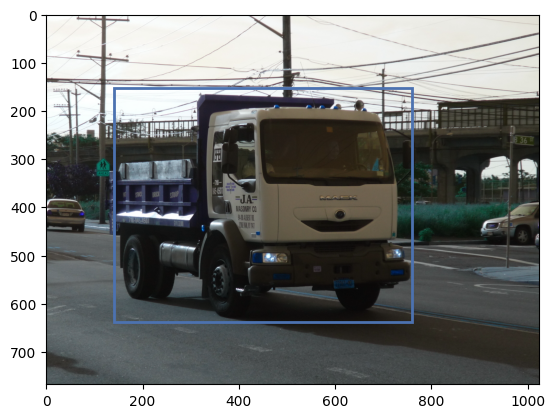

In [63]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from PIL import Image

# Display the image
plt.imshow(results[0].orig_img)

# Get the current reference
ax = plt.gca()

x1, y1, x2, y2, _, _ = results[0].boxes.data.numpy()[0]

# Create a Rectangle patch
rect = Rectangle((x1,y1) ,x2-x1, y2-y1, linewidth=2,edgecolor='b',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111, aspect='equal')

# ax2.add_patch(
#      patches.Rectangle(
#         (0.1, 0.1),
#         0.5,
#         0.5,
#         fill=False      # remove background
#      ) )
# fig2.savefig('rect2.png', dpi=90, bbox_inches='tight')

In [40]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 36.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 18.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 21.4s, saved as 'runs/detect/train2/weights/best.onnx' (11.7 MB)

Export complete (25.4s)
Results saved to /content/OIDv4_ToolKit/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=/content/config.ya

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



#Classification

Adjust dataset for the Classification task only

In [ ]:
labels = ['Tree', 'Person', 'Truck']

for label in labels:
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)

  os.makedirs(f'/content/data/val/{label}', exist_ok=True)
  os.makedirs(f'/content/data/val/{label}', exist_ok=True)

In [ ]:
path = '/content/data/obj/train/'
DATA_ROOT = '/content/data/'

VAL_THRESHOLD = 0.2

for category in os.listdir(path):
  category_path = path+category

  for i in os.listdir(category_path):
    if i[-4:] == '.jpg':
      file_name = i
      image_file = category_path + '/' + i
      rand_num = np.random.rand()
      target = 'val' if rand_num <= VAL_THRESHOLD else 'train'
      os.rename(image_file, f'/content/data/{target}/{category}/{i}')

In [ ]:
os.rename('/content/data/obj', '/content/obj')
os.rename('/content/data/obj.names', '/content/obj.names')
os.rename('/content/data/train.txt', '/content/train.txt')

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

results = model.train(data='/content/data', epochs=20)

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [ ]:
!scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [ ]:
metrics = model.val()
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                   all        0.8          1
Speed: 0.0ms preprocess, 16.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


0.800000011920929

In [ ]:
metrics.top5   # top5 accuracy

1.0

In [ ]:
results = model('/content/blue-truck-homepage-618x340.jpg')  # predict on an image


image 1/1 /content/blue-truck-homepage-618x340.jpg: 224x224 Truck 1.00, Person 0.00, Tree 0.00, 30.6ms
Speed: 1.8ms preprocess, 30.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 keys: ['probs']
 masks: None
 names: {0: 'Person', 1: 'Tree', 2: 'Truck'}
 orig_img: array([[[213, 172, 140],
         [211, 170, 138],
         [208, 167, 135],
         ...,
         [223, 203, 186],
         [225, 206, 191],
         [228, 209, 194]],
 
        [[213, 172, 140],
         [210, 169, 137],
         [207, 166, 134],
         ...,
         [225, 205, 188],
         [227, 208, 193],
         [229, 210, 195]],
 
        [[211, 170, 138],
         [209, 168, 136],
         [206, 165, 133],
         ...,
         [229, 209, 192],
         [228, 209, 194],
         [231, 212, 197]],
 
        ...,
 
        [[186, 197, 205],
         [181, 192, 200],
         [179, 190, 198],
         ...,
         [200, 209, 212],
         [198, 207, 210],
         [200, 209, 212]],
 
        [[186, 197, 205],
         [181, 192, 200],
         [180, 191, 199],
         ...,
         [198, 207, 210]

In [ ]:
import matplotlib.pyplot as plt

res = plt.imread('/content/blue-truck-homepage-618x340.jpg')
plt.imshow(res)